<a href="https://colab.research.google.com/github/benzaitsue/big-data/blob/main/Depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("depressionPrediction").getOrCreate()

In [4]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving Depression Student Dataset.csv to Depression Student Dataset.csv


In [5]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())


   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Mental Illness Depression  
0                 2                              Y

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("DataFrameExample").getOrCreate()
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df_spark = spark.read.csv(file_name, header=True, inferSchema=True)
df_pandas = df_spark.toPandas()
print(df_pandas.head())


Saving Depression Student Dataset.csv to Depression Student Dataset (1).csv
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family History of Me

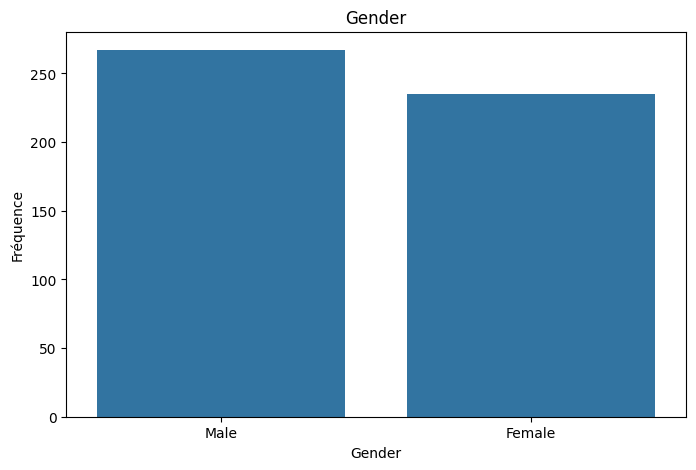

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df_pandas,)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Fréquence')
plt.show()

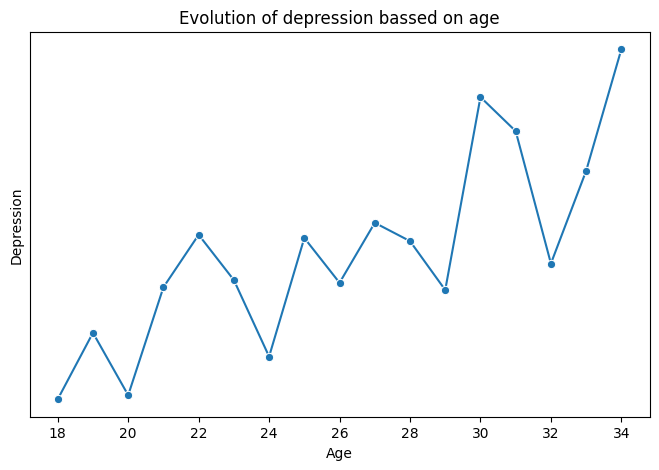

In [9]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='Depression', data=df_pandas, marker='o', errorbar=None)
plt.title('Evolution of depression bassed on age')
plt.xlabel('Age')
plt.ylabel('Depression')
plt.show()

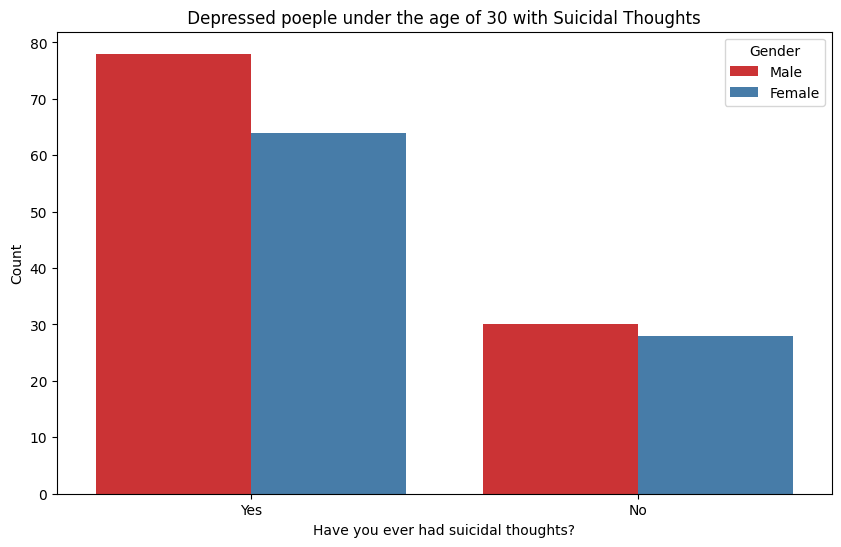

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = df_pandas[(df_pandas['Age'] < 30) & (df_pandas['Depression'] == "Yes")]

plt.figure(figsize=(10, 6))
sns.countplot(
    x='Have you ever had suicidal thoughts ?',
    hue='Gender',
    data=filtered_data,
    palette='Set1'
)
plt.title(" Depressed poeple under the age of 30 with Suicidal Thoughts ")
plt.xlabel("Have you ever had suicidal thoughts?")
plt.ylabel("Count")
plt.legend(title="Gender", loc="upper right")
plt.show()


In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DepressionPrediction").getOrCreate()


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
file_path = "/content/drive/MyDrive/Depression Student Dataset.csv"

# Charger les données dans un DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.groupBy("Depression","Have you ever had suicidal thoughts ?").count().show()

+----------+-------------------------------------+-----+
|Depression|Have you ever had suicidal thoughts ?|count|
+----------+-------------------------------------+-----+
|       Yes|                                  Yes|  189|
|        No|                                   No|  179|
|       Yes|                                   No|   63|
|        No|                                  Yes|   71|
+----------+-------------------------------------+-----+



In [33]:

from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.appName("Save30Percent").getOrCreate()

# Charger le fichier CSV
data = spark.read.csv("/content/drive/MyDrive/Depression Student Dataset.csv", header=True, inferSchema=True)

# Diviser les données pour prendre 30%
df1, sample_data = data.randomSplit([0.7, 0.3], seed=1234)

# Sauvegarder ces 30% dans un fichier CSV dans Google Drive
sample_data.write.csv("/content/drive/MyDrive/Depression Student Dataset_30.csv", header=True, mode="overwrite")
df1.write.csv("/content/drive/MyDrive/Depression Student Dataset_70.csv", header=True, mode="overwrite")
# Afficher les premières lignes pour vérifier
sample_data.show(5)


+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Gender|Age|Academic Pressure|Study Satisfaction|   Sleep Duration|Dietary Habits|Have you ever had suicidal thoughts ?|Study Hours|Financial Stress|Family History of Mental Illness|Depression|
+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Female| 18|              1.0|               5.0|Less than 5 hours|     Unhealthy|                                   No|         11|               5|                             Yes|       Yes|
|Female| 18|              1.0|               5.0|More than 8 hours|      Moderate|                                  Yes|          7|               5|                              No|       Yes|
|Female| 18|              3.0|

In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Créer une session Spark
spark = SparkSession.builder.appName("DecisionTreeDepressed").getOrCreate()

# Charger le fichier CSV
data = spark.read.csv("/content/drive/MyDrive/Depression Student Dataset_70.csv", header=True, inferSchema=True)

# Afficher les premières lignes du DataFrame pour vérifier les données
data.show(5)


+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Gender|Age|Academic Pressure|Study Satisfaction|   Sleep Duration|Dietary Habits|Have you ever had suicidal thoughts ?|Study Hours|Financial Stress|Family History of Mental Illness|Depression|
+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Female| 18|              1.0|               5.0|Less than 5 hours|     Unhealthy|                                   No|         11|               5|                             Yes|       Yes|
|Female| 18|              2.0|               4.0|        7-8 hours|       Healthy|                                   No|          9|               2|                              No|        No|
|Female| 18|              2.0|

In [16]:
from pyspark.sql import functions as F

# Convert 'Yes' to 1 and 'No' to 0 in the "Depression" column
data = data.withColumn("Depression",
                       F.when(F.col("Depression") == "Yes", 1).otherwise(0))

# If you want to apply it to other columns as well (e.g., "Family History of Mental Illness")
data = data.withColumn("Family History of Mental Illness",
                       F.when(F.col("Family History of Mental Illness") == "Yes", 1).otherwise(0))

data = data.withColumn("Have you ever had suicidal thoughts ?",
                       F.when(F.col("Have you ever had suicidal thoughts ?") == "Yes", 1).otherwise(0))

# Afficher les premières lignes pour vérifier la conversion
data.show(5)


+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Gender|Age|Academic Pressure|Study Satisfaction|   Sleep Duration|Dietary Habits|Have you ever had suicidal thoughts ?|Study Hours|Financial Stress|Family History of Mental Illness|Depression|
+------+---+-----------------+------------------+-----------------+--------------+-------------------------------------+-----------+----------------+--------------------------------+----------+
|Female| 18|              1.0|               5.0|Less than 5 hours|     Unhealthy|                                    0|         11|               5|                               1|         1|
|Female| 18|              2.0|               4.0|        7-8 hours|       Healthy|                                    0|          9|               2|                               0|         0|
|Female| 18|              2.0|

In [19]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

# Créer une session Spark
spark = SparkSession.builder.appName("DecisionTreeDepression").getOrCreate()

# Charger le fichier CSV
data = spark.read.csv("/content/drive/MyDrive/Depression Student Dataset_80.csv", header=True, inferSchema=True)

# Conversion des colonnes catégorielles (Yes/No) en 1/0
data = data.withColumn("Depression", F.when(F.col("Depression") == "Yes", 1).otherwise(0))
data = data.withColumn("Family History of Mental Illness", F.when(F.col("Family History of Mental Illness") == "Yes", 1).otherwise(0))
data = data.withColumn("Have you ever had suicidal thoughts ?", F.when(F.col("Have you ever had suicidal thoughts ?") == "Yes", 1).otherwise(0))

# Liste des colonnes à utiliser comme caractéristiques
feature_columns = ["Gender", "Age", "Academic Pressure", "Study Satisfaction", "Sleep Duration",
                   "Dietary Habits", "Have you ever had suicidal thoughts ?", "Study Hours",
                   "Financial Stress", "Family History of Mental Illness"]

# Convertir les colonnes catégorielles en numériques (ex: Gender, Sleep Duration, Dietary Habits)
data = data.withColumn("Gender", F.when(F.col("Gender") == "Female", 0).otherwise(1))
data = data.withColumn("Sleep Duration", F.when(F.col("Sleep Duration") == "Less than 5 hours", 0)
                      .when(F.col("Sleep Duration") == "7-8 hours", 1)
                      .when(F.col("Sleep Duration") == "More than 8 hours", 2)
                      .otherwise(3))
data = data.withColumn("Dietary Habits", F.when(F.col("Dietary Habits") == "Unhealthy", 0)
                      .when(F.col("Dietary Habits") == "Healthy", 1)
                      .otherwise(2))

# Assembler les caractéristiques dans une colonne 'features'
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Définir l'arbre de décision
dt = DecisionTreeClassifier(labelCol="Depression", featuresCol="features", predictionCol="prediction")

# Construire le pipeline
pipeline = Pipeline(stages=[assembler, dt])

# Diviser les données en ensemble d'entraînement et de test
train_data, test_data = data.randomSplit([0.8, 0.2], seed=1234)

# Entraîner le modèle
model = pipeline.fit(train_data)

# Appliquer les prédictions sur les données de test
predictions = model.transform(test_data)

# Afficher les résultats de prédiction
predictions.select("prediction", "Depression", "features").show(5)

# Évaluation du modèle avec AUC
evaluator = BinaryClassificationEvaluator(labelCol="Depression", rawPredictionCol="prediction")

# Calculer l'AUC (Area Under Curve)
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

# Sauvegarder le modèle
model.write().overwrite().save("decision_tree_model_Depressed")



+----------+----------+--------------------+
|prediction|Depression|            features|
+----------+----------+--------------------+
|       0.0|         0|[0.0,18.0,2.0,4.0...|
|       1.0|         1|[0.0,18.0,4.0,1.0...|
|       1.0|         0|[0.0,20.0,2.0,5.0...|
|       0.0|         0|[0.0,20.0,3.0,2.0...|
|       1.0|         1|[0.0,20.0,3.0,2.0...|
+----------+----------+--------------------+
only showing top 5 rows

AUC: 0.8214285714285714


In [35]:
from pyspark.sql.functions import col

predictions = predictions.withColumn("is_correct", (col("prediction") == col("Depression")).cast("integer"))

error_rate = 1 - (predictions.groupBy().sum("is_correct").first()[0] / predictions.count())
print(f"error rate: {error_rate:.2f}")


error rate: 0.18
